In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import torch
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import cv2




In [3]:
 DATA_SET="/content/drive/My Drive/GDFiles/Stage_2"
 CATEGORIES=["Memes","Notes"]

In [4]:
data=[]

IMG_SIZE=64

for category in CATEGORIES:
  folder=os.path.join(DATA_SET,category)
  label=CATEGORIES.index(category)
  for img in os.listdir(folder):
      img_path=os.path.join(folder,img)
      img_array=cv2.imread(img_path)
      img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      data.append([img_array,label])

In [5]:
random.shuffle(data)

In [6]:
X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)

In [7]:
X=np.array(X)
Y=np.array(Y)

In [8]:
XT=torch.from_numpy(X)

In [9]:
YT=torch.from_numpy(Y)

In [10]:
 import torchvision
 import torchvision.transforms as transforms

In [11]:
 from torch.utils.data import random_split

 nontest_ds, test_ds = random_split(data, [1300, 300])
 train_ds,val_ds= random_split(nontest_ds, [1000,300])
 len(train_ds),len(val_ds),len(test_ds)

(1000, 300, 300)

In [30]:
from torch.utils.data import DataLoader

batch_size = 50

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)


In [13]:
import torch.nn as nn

input_size = 64*64*3
num_classes = 2

# Logistic regression model
model = nn.Linear(input_size, num_classes)
print(input_size)

12288


In [14]:
for images, labels in train_loader:
    images=torch.true_divide(images,255)
    outputs = model(images.float())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)
print(images.shape)


RuntimeError: ignored

In [15]:
import torch.nn.functional as F

In [16]:
probs = F.softmax(outputs, dim=1)
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

NameError: ignored

In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0])
tensor([0.5505, 0.5919, 0.5738, 0.6358, 0.5571, 0.6023, 0.6143, 0.6386, 0.5491,
        0.5474, 0.5003, 0.6225, 0.5361, 0.5779, 0.5643, 0.5784, 0.5477, 0.6133,
        0.5743, 0.6685, 0.5488, 0.5158, 0.5562, 0.5348, 0.6231, 0.5159, 0.5723,
        0.5509, 0.5354, 0.5958, 0.6521, 0.5863, 0.6438, 0.5904, 0.6531, 0.5936,
        0.5758, 0.5617, 0.5457, 0.6101, 0.5858, 0.6007, 0.5574, 0.6062, 0.5423,
        0.5739, 0.6296, 0.6114, 0.5488, 0.5860], grad_fn=<MaxBackward0>)


tensor([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1])

In [81]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
  

In [23]:
class MN(nn.Module):
    def __init__(self,in_size,hidden_layer1,hidden_layer2,num_classes):
        super().__init__()
        self.linear1 = nn.Linear(in_size, hidden_layer1)
        self.linear2 = nn.Linear(hidden_layer1,hidden_layer2)
        self.linear3 = nn.Linear(hidden_layer2,num_classes)
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer 1
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using hidden layer 2
        out = self.linear2(out)
        #Apply activation function
        out = F.relu(out)
        # Get predictions using out layer
        out= self.linear3(out)

        return out
    
    def training_step(self, batch):
        images, labels = batch 
        images=torch.true_divide(images,255)
        out = self(images)                  # Generate predictions
        probs = F.softmax(out, dim=1)

        loss = F.cross_entropy(out, labels) # Calculate loss
        acc = accuracy(probs, labels)           # Calculate accuracy
        return loss
        
    
    def validation_step(self, batch):
        images, labels = batch 
        images=torch.true_divide(images,255)
        out = self(images)                    # Generate predictions
        probs = F.softmax(out, dim=1)

        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(probs, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        

    def training_epoch_end(self, outputs):
        batch_losses = [x['train_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['train_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'train_loss': epoch_loss.item(), 'train_acc': epoch_acc.item()}
    
    def epoch_endt(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['train_loss'], result['train_acc']))


In [24]:
input_size=12288
hidden_layer1=1000
hidden_layer2=50
out_layer=2


In [25]:
model=MN(input_size,hidden_layer1,hidden_layer2,out_layer)

In [26]:
for t in model.parameters():
    print(t.shape)

torch.Size([1000, 12288])
torch.Size([1000])
torch.Size([50, 1000])
torch.Size([50])
torch.Size([2, 50])
torch.Size([2])


In [32]:
for images, labels in train_loader:
    images=torch.true_divide(images,255)
    outputs = model(images)
    
loss = F.cross_entropy(outputs, labels)
print('Loss:', loss.item())
    

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 0.7342897057533264
outputs.shape :  torch.Size([50, 2])
Sample outputs :
 tensor([[-0.0738,  0.0626],
        [-0.1171,  0.0786]])


In [103]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    losseslist=[]
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            
            
            loss = model.training_step(batch)
            losseslist.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

              
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
        print(epoch)
        plt.plot(losseslist,'-x')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('loss graph per epoch')
        plt.show()
    return history


**Below is the result for validation set**

In [ ]:
history += fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4553, val_acc: 0.7500
Epoch [1], val_loss: 0.7192, val_acc: 0.7200
Epoch [2], val_loss: 0.4974, val_acc: 0.7867
Epoch [3], val_loss: 0.3772, val_acc: 0.8133
Epoch [4], val_loss: 0.4039, val_acc: 0.7600
Epoch [5], val_loss: 0.4440, val_acc: 0.8200
Epoch [6], val_loss: 0.3248, val_acc: 0.8733
Epoch [7], val_loss: 0.5938, val_acc: 0.8033
Epoch [8], val_loss: 0.2794, val_acc: 0.8800
Epoch [9], val_loss: 0.2234, val_acc: 0.9000


In [ ]:
history += fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.3024, val_acc: 0.8567
Epoch [1], val_loss: 0.2443, val_acc: 0.8900
Epoch [2], val_loss: 0.2236, val_acc: 0.9000
Epoch [3], val_loss: 0.7189, val_acc: 0.7867
Epoch [4], val_loss: 0.2875, val_acc: 0.8800
Epoch [5], val_loss: 0.2463, val_acc: 0.9100
Epoch [6], val_loss: 0.2018, val_acc: 0.9067
Epoch [7], val_loss: 0.2560, val_acc: 0.9033
Epoch [8], val_loss: 0.2418, val_acc: 0.9067
Epoch [9], val_loss: 0.2609, val_acc: 0.8967


*Below is the results for training set*



In [ ]:
 history += fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.0771, val_acc: 0.9804
Epoch [1], val_loss: 0.2581, val_acc: 0.8716
Epoch [2], val_loss: 0.1268, val_acc: 0.9578
Epoch [3], val_loss: 0.0578, val_acc: 0.9794
Epoch [4], val_loss: 0.0491, val_acc: 0.9843
Epoch [5], val_loss: 0.0419, val_acc: 0.9892
Epoch [6], val_loss: 0.2989, val_acc: 0.8784
Epoch [7], val_loss: 0.0919, val_acc: 0.9667
Epoch [8], val_loss: 0.0375, val_acc: 0.9882
Epoch [9], val_loss: 0.0360, val_acc: 0.9922


#BELOW IS THE GRAPH OF traning set LOSS PER epoch

Epoch [0], val_loss: 0.0278, val_acc: 0.9940


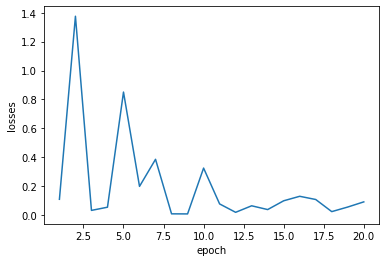

Epoch [1], val_loss: 0.0200, val_acc: 0.9960


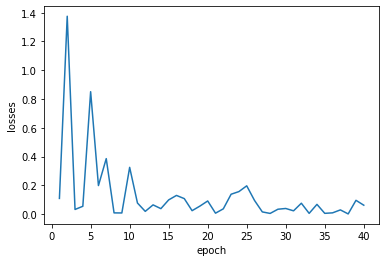

Epoch [2], val_loss: 0.0199, val_acc: 0.9950


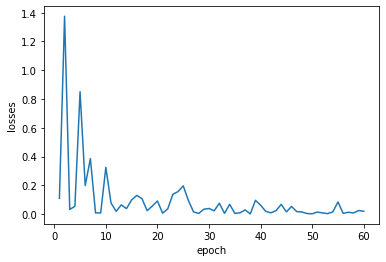

Epoch [3], val_loss: 0.0271, val_acc: 0.9940


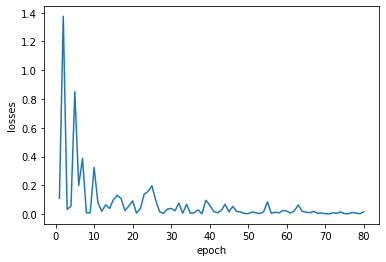

Epoch [4], val_loss: 0.0175, val_acc: 0.9960


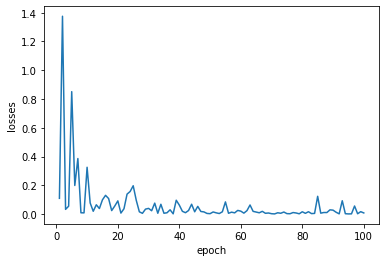

Epoch [5], val_loss: 0.0301, val_acc: 0.9920


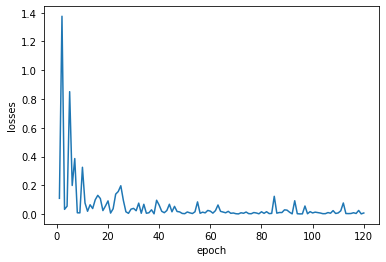

Epoch [6], val_loss: 0.0143, val_acc: 0.9960


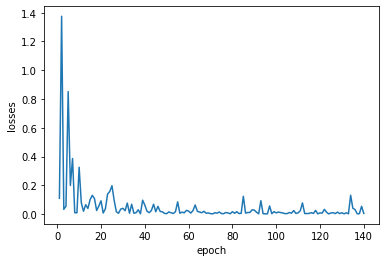

In [53]:
 historyyy=fit(7, 0.001, model, train_loader, val_loader)


#BELOW IS THE GRAPH FOR VALIDATION SET


In [87]:
history1=fit(7, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4518, val_acc: 0.8433
Epoch [1], val_loss: 0.4373, val_acc: 0.8933
Epoch [2], val_loss: 0.3717, val_acc: 0.9100
Epoch [3], val_loss: 0.5474, val_acc: 0.8967
Epoch [4], val_loss: 0.3788, val_acc: 0.9067
Epoch [5], val_loss: 0.3853, val_acc: 0.9000
Epoch [6], val_loss: 0.3785, val_acc: 0.9033


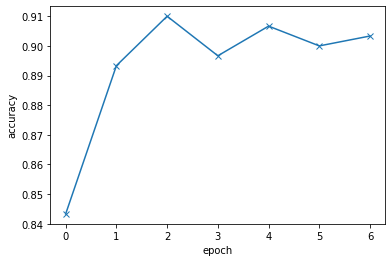

In [88]:
history=history1
correction=[result['val_acc'] for result in history]

plt.plot(correction,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()